In [10]:
%matplotlib inline

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt

import seaborn as sns

In [32]:
n_grps = 20
data = np.random.randn(10000, n_grps)
mus = np.random.randn(n_grps) * .2
data += mus

In [33]:
data.mean(axis=0)

array([-0.02949421, -0.08087427,  0.41964502, -0.10257998, -0.08321741,
       -0.2927196 ,  0.20643054, -0.28360575, -0.30073578, -0.14320213,
        0.22091251, -0.09066833,  0.20965825,  0.08824718, -0.13353295,
        0.37962841,  0.0658648 ,  0.14008352,  0.11710135,  0.44017426])

In [35]:
with pm.Model() as model_centered:
    mu_grp = pm.Normal('mu_grp', sd=3)
    sigma_grp = pm.HalfNormal('sigma_grp', sd=5)
    mu_raw = pm.Normal('mu_raw', shape=n_grps)
    mu_indiv = mu_raw * sigma_grp + mu_grp
    pm.Normal('obs', mu=mu_indiv, sd=1, observed=data)
    
with pm.Model() as model_non_centered:
    mu_grp = pm.Normal('mu_grp', sd=3)
    sigma_grp = pm.HalfNormal('sigma_grp', sd=5)
    mu_indiv = pm.Normal('mu_raw', mu=mu_grp, sd=sigma_grp, shape=n_grps)
    pm.Normal('obs', mu=mu_indiv, sd=1, observed=data)
    
# with pm.Model() as model_centered:
#     mu_grp = pm.Normal('mu_grp', sd=3)
#     sigma_grp = pm.HalfNormal('sigma_grp', sd=5)
#     mu_raw = pm.Normal('mu_raw', sd=sigma_grp ** s, shape=n_grps)
#     mu_indiv = mu_raw * sigma_grp ** (1 - s) + mu_grp
#     pm.Normal('obs', mu=mu_indiv, sd=1, observed=data)

In [36]:
with model_centered:
    trace_centered = pm.sample()
    
with model_non_centered:
    trace_non_centered = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu_raw, sigma_grp, mu_grp]
Sampling 2 chains: 100%|██████████| 2000/2000 [01:50<00:00, 19.34draws/s]
The acceptance probability does not match the target. It is 0.8879758947691774, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu_raw, sigma_grp, mu_grp]
Sampling 2 chains: 100%|██████████| 2000/2000 [00:27<00:00, 72.06draws/s] 


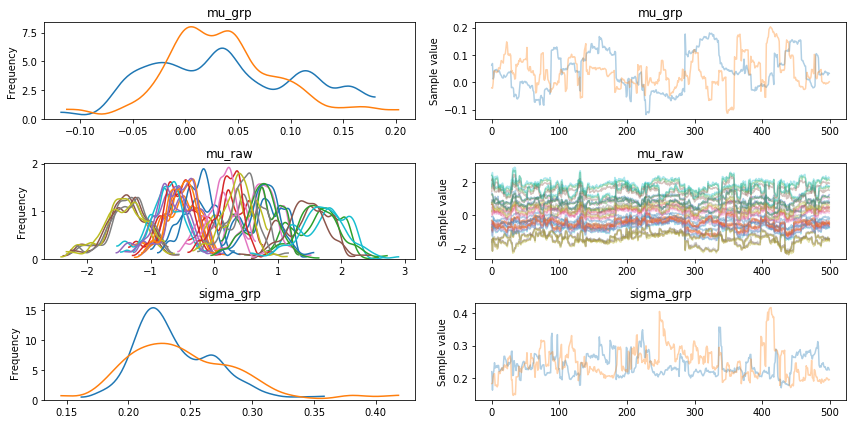

In [41]:
pm.traceplot(trace_centered);

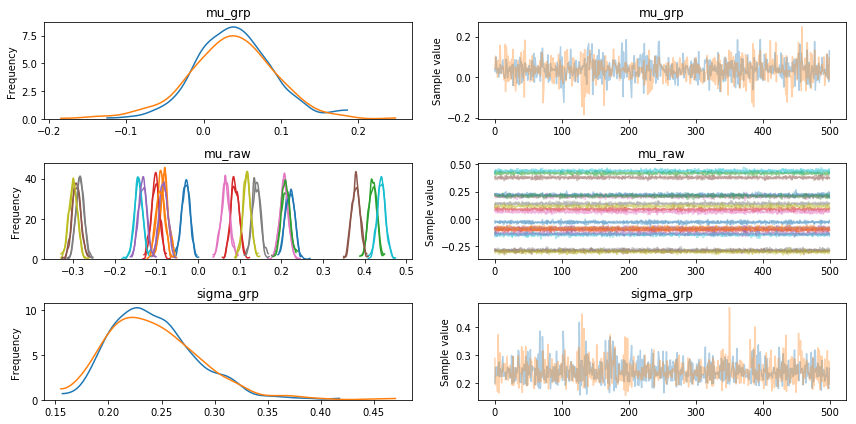

In [42]:
pm.traceplot(trace_non_centered);

/Users/twiecki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/twiecki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


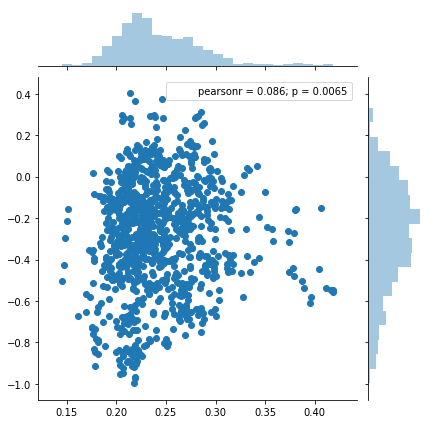

In [43]:
sns.jointplot(trace_centered['sigma_grp'], trace_centered['mu_raw'][:, 0])

/Users/twiecki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/twiecki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


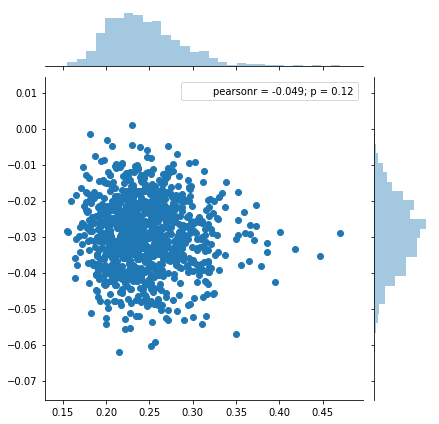

In [44]:
sns.jointplot(trace_non_centered['sigma_grp'], trace_non_centered['mu_raw'][:, 0])